<a href="https://colab.research.google.com/github/henryhuaraya123/Inteligencia-Regresion-Lineal/blob/main/Pr%C3%A1ctica_Regresi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lectura y limpieza del data

In [1]:
import pandas as pd
data = pd.read_csv("cars_dataset.csv")

In [2]:
data.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
data.shape

(8128, 13)

#Analisis Y limpieza de nuestro data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


## ELIMINAR LOS NaN

In [6]:
# Cantidad de celdas vacias por columna
data.isna().sum().sort_values()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
max_power        215
mileage          221
engine           221
seats            221
torque           222
dtype: int64

In [7]:
#eliminado los valores vacios -> fila que contenga NaN adios
data = data. dropna() 

In [8]:
# Cantidad de celdas vacias por columna
data.isna().sum().sort_values()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [9]:
data.shape

(7906, 13)

## CONVERTIR LOS VALORES OBJECT A INT

In [10]:
# Conversion de los tipos de datos objeto a numeros
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# Columnas que son tipo objeto que deboms convertir a numeros y darle clasificacion
c = [0,4,5,6,7,8,9,10,11]

for i in c:
  data.iloc[:, i] = labelencoder.fit_transform(data.iloc[:,i])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   int64  
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   int64  
 5   seller_type    7906 non-null   int64  
 6   transmission   7906 non-null   int64  
 7   owner          7906 non-null   int64  
 8   mileage        7906 non-null   int64  
 9   engine         7906 non-null   int64  
 10  max_power      7906 non-null   int64  
 11  torque         7906 non-null   int64  
 12  seats          7906 non-null   float64
dtypes: float64(1), int64(12)
memory usage: 864.7 KB


In [12]:
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,1249,2014,450000,145500,1,1,1,0,335,13,242,178,5.0
1,1546,2014,370000,120000,1,1,1,2,284,36,13,260,5.0
2,375,2006,158000,140000,3,1,1,4,180,35,251,66,5.0
3,743,2010,225000,127000,1,1,1,0,327,24,295,224,5.0
4,1290,2007,130000,120000,3,1,1,0,136,14,286,21,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,733,2013,320000,110000,3,1,1,0,202,10,265,37,5.0
8124,618,2007,135000,119000,1,1,1,1,154,32,28,250,5.0
8125,1261,2009,382000,120000,1,1,1,0,222,13,239,178,5.0
8126,1633,2013,290000,25000,1,1,1,0,337,24,230,106,5.0


In [13]:
data.shape

(7906, 13)

## ELIMINAR REGISTROS DUPLICADOS

In [14]:
# Columnas que no me sirven para nada
data = data.drop_duplicates()

In [15]:
data.shape

(6717, 13)

## NORMALIZAMOS NUESTROS DATOS

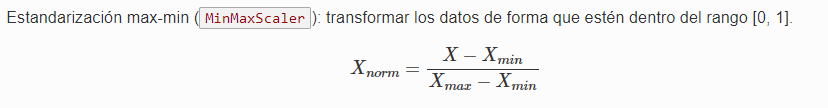

In [16]:
#como vemos algunos de nuestros valores son demasiados grandes por ello lo escalaremos o nomralizamos
data = (data - data.min())/(data.max() - data.min())

In [17]:
data.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,0.630490,0.769231,0.042126,0.061640,0.333333,0.5,1.0,0.0,0.854592,0.108333,0.758621,0.404545,0.250000
1,0.780414,0.769231,0.034102,0.050837,0.333333,0.5,1.0,0.5,0.724490,0.300000,0.040752,0.590909,0.250000
2,0.189298,0.461538,0.012839,0.059310,1.000000,0.5,1.0,1.0,0.459184,0.291667,0.786834,0.150000,0.250000
3,0.375063,0.615385,0.019559,0.053803,0.333333,0.5,1.0,0.0,0.834184,0.200000,0.924765,0.509091,0.250000
4,0.651186,0.500000,0.010030,0.050837,1.000000,0.5,1.0,0.0,0.346939,0.116667,0.896552,0.047727,0.250000
5,0.330641,0.884615,0.041123,0.019064,1.000000,0.5,1.0,0.0,0.627551,0.083333,0.818182,0.081818,0.250000
6,0.675416,0.500000,0.006620,0.074138,0.666667,0.5,1.0,0.0,0.428571,0.008333,0.605016,0.913636,0.250000
7,0.512872,0.269231,0.001505,0.002118,1.000000,0.5,1.0,0.5,0.346939,0.933333,0.532915,0.881818,0.166667
8,0.927814,0.653846,0.032096,0.038128,0.333333,0.5,1.0,0.0,0.862245,0.158333,0.695925,0.327273,0.250000
9,0.140333,0.730769,0.017051,0.071596,0.333333,0.5,1.0,0.0,0.622449,0.208333,0.708464,0.315909,0.250000


## GRAFICAMOS LA RELACION ENTRADA , SALIDA
Vamos analizando la relacion que habra entre cada una de nuestras variables de entrada con la variable de salida

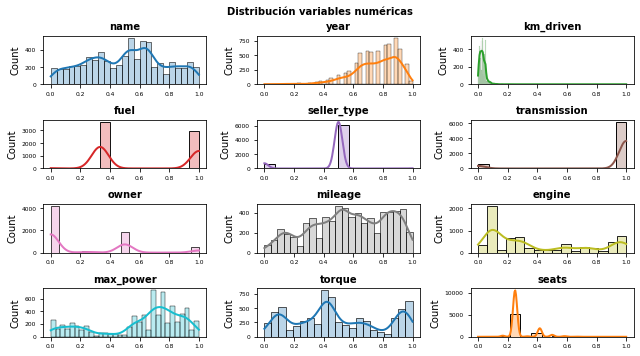

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = data.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('selling_price')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = data,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

# Division del dataset en X_train y y_train

In [19]:
# Una vez realizado la limpieza y purificacion de nuestro data, usaremos todos nuestros registros como entrenamiento del modelo , no habra ninguna data-evaluacion
import numpy as np
# identificamos nuestras x que son todas las columans menos selling_price
x_train = data.iloc[:,[0,1,3,4,5,6,7,8,9,10,11,12]].values
# solo seleccionamos selling_price
y_train = data.iloc[:,2].values

In [20]:
x_train.shape

(6717, 12)

In [21]:
y_train.shape

(6717,)

# Creación del modelo mediante regresión lineal múltivariable sin librerias

## Funciones requeridas para realizar el modelo

In [41]:
def predict(x, w, b): 
    p = np.dot(x, w) + b  #paralelo   
    return p 

In [42]:
def compute_cost(X, y, w, b): 
    y_pred = predict(X, w, b)
    cost = (((y_pred-y)**2).sum())/(2*len(y))
    return cost

In [43]:
def compute_gradient(X, y, w, b): 
    
    y_pred = predict(X, w, b)
    dj_dw = []
    
    for i in range(X.shape[1]):
      p = (y_pred - y) * [X[j][i] for j in range(len(y))]
      dj_dw.append(p.sum()/ len(y))

    dj_db = ((y_pred - y).sum())/ len(y)  
    return dj_db, dj_dw

In [44]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 

    # Un array que almacena el costo J y los pesos w's de cada iteración para graficar
    J_history = []

    while num_iters != 0:

      #nuevos valores de w y b
      b , w = compute_gradient(X,y,w_in,b_in)
      # actualizacion
      
      for i in range(len(w)):
        w_in[i] = w_in[i] - (alpha *(w[i]))

      b_in = b_in - (alpha *(b))

      #almacenamos el costo de esa prediccion con w y b
      J_history.append(compute_cost(X,y,w_in,b_in))


      num_iters = num_iters - 1 

    return w_in, b_in, J_history

## Definicion de los parametros de nuestro modelo

In [ ]:
import numpy as np
initial_w = np.zeros_like(x_train[0])
initial_b = 0.

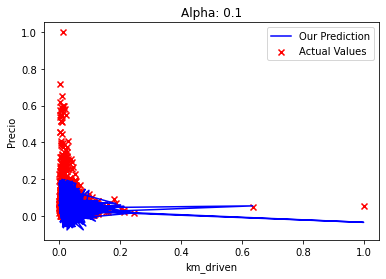

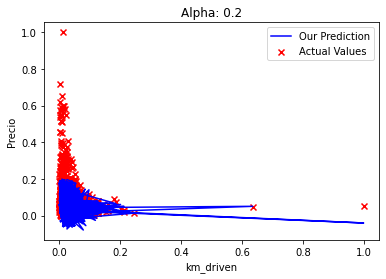

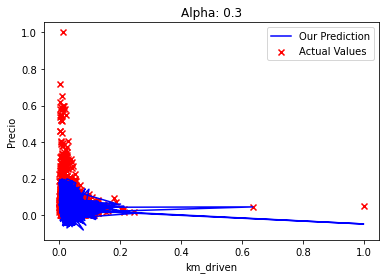

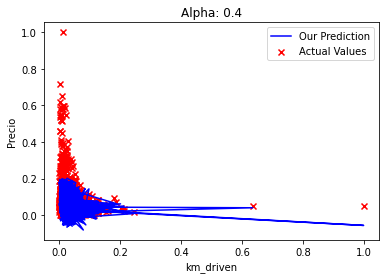

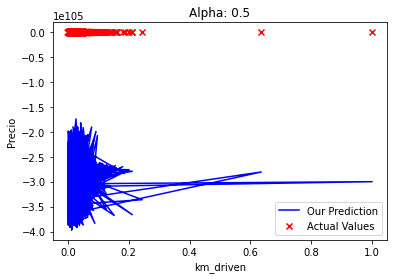

In [ ]:
# Escoger el mejor alpha
alphas = [0.1 , 0.2 , 0.3 , 0.4 , 0.5]
for alpha in alphas:
  # configuración de parámetros para el algoritmo de la gradiente por descenso
  iterations = 1000
  # ejecutar el algoritmo de la gradiente descendiente
  w_final, b_final, J_hist = gradient_descent(x_train, y_train, initial_w, initial_b,compute_cost, compute_gradient, alpha, iterations)

  # prediccion con el w optimo
  tmp_f_wb = predict(x_train,w_final,b_final)

  # Plot our model prediction
  plt.plot(x_train[:,[2]], tmp_f_wb, c='b',label='Our Prediction')

  # Plot the data points
  plt.scatter(x_train[:,[2]], y_train, marker='x', c='r',label='Actual Values')

  # Set the title
  plt.title("Alpha: " + str(alpha))
  # Set the y-axis label
  plt.ylabel('Precio')
  # Set the x-axis label
  plt.xlabel('km_driven')
  plt.legend()
  plt.show()

In [45]:
initial_w = np.zeros_like(x_train[0])
initial_b = 0.
iterations = 1000
alpha = 0.2
# ejecutar el algoritmo de la gradiente descendiente
w_final, b_final, J_hist = gradient_descent(x_train, y_train, initial_w, initial_b,compute_cost, compute_gradient, alpha, iterations)

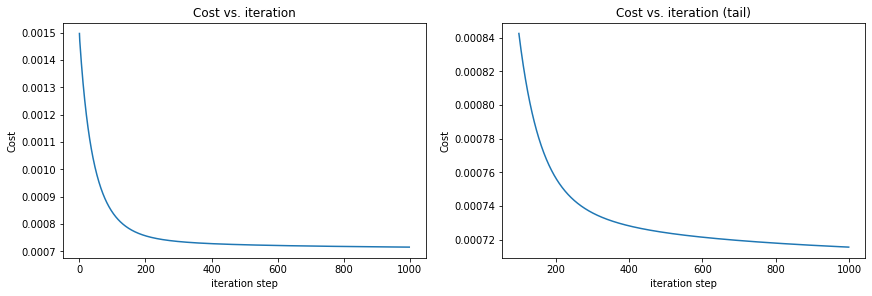

In [ ]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

## RESULTADOS CON EL MODELO QUE PREDICE COLUMNA POR COLUMNA

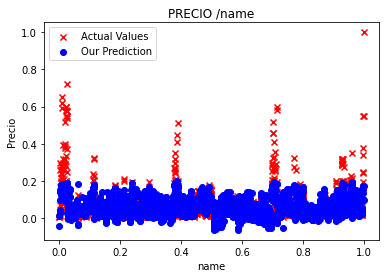

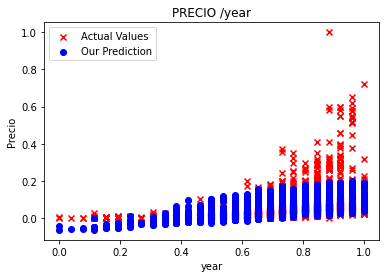

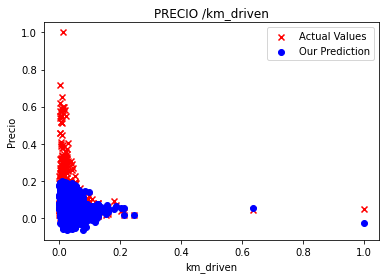

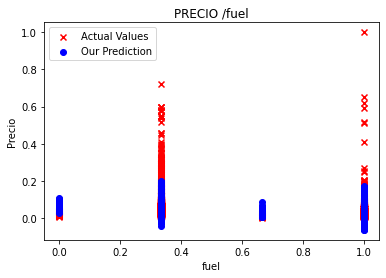

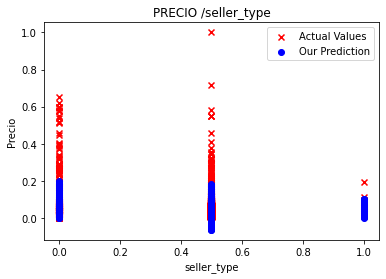

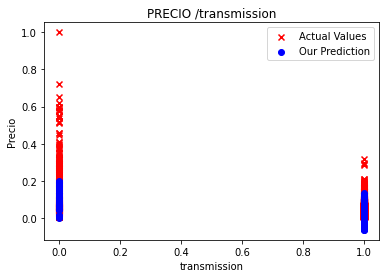

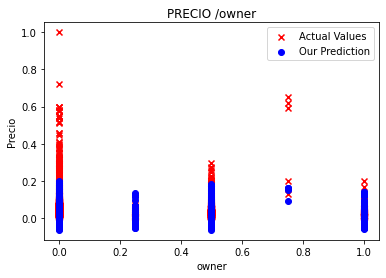

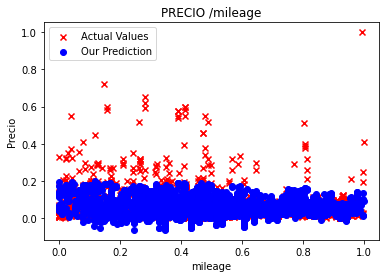

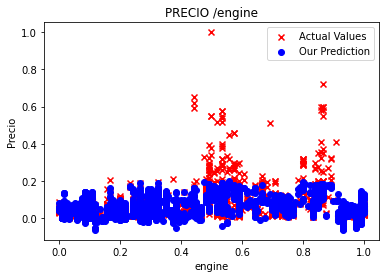

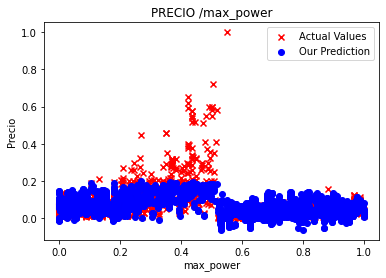

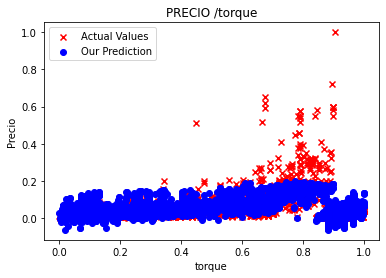

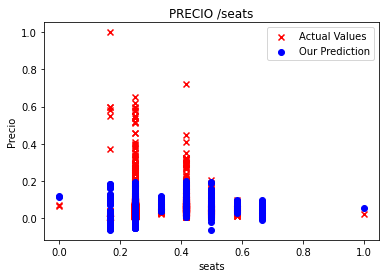

In [46]:
columns_names = data.columns.values
columns_names=np.delete(columns_names,2)
tmp_f_wb = predict(x_train,w_final,b_final)
for i in range(12):
  # Plot the data points
  plt.scatter(x_train[:,[i]], y_train, marker='x', c='r',label='Actual Values')

  # Plot our model prediction
  plt.scatter(x_train[:,[i]], tmp_f_wb,marker='o', c='b',label='Our Prediction')


  plt.title("PRECIO /" + str(columns_names[i]))
  # Set the y-axis label
  plt.ylabel('Precio')
  # Set the x-axis label
  plt.xlabel(str(columns_names[i]))
  plt.legend()
  plt.show()

# Creacion del modelo con librerias

In [30]:
#IMPORTAMOS LAS LIBRERIA
from sklearn import linear_model
from sklearn.model_selection import train_test_split

#USALOS NUESTRO x_train Y y_train PARA DIVIDIRLO EN DOS-> UNA PARTE PARA EL ENTRENAMIENTO 90 % Y LA OTRA PARA LA EVALUACION 10%
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.1)


In [31]:
modelo = linear_model.LinearRegression()
#Entrenar modelo
modelo.fit(X_train, Y_train)

LinearRegression()

In [32]:
print('Valores de las w pesos de cada varaible de entrada')
print(modelo.coef_)
print('Valor de la intersección o coeficiente b:')
print(modelo.intercept_)

Valores de las w pesos de cada varaible de entrada
[-0.00620421  0.16085432 -0.10865989 -0.04537398 -0.03967852 -0.05948497
 -0.00487909 -0.0677218  -0.00130887 -0.00215685  0.02128195 -0.06414923]
Valor de la intersección o coeficiente b:
0.08547149322319475


In [34]:
print('Precisión del modelo:')
print(modelo.score(X_train, Y_train))

Precisión del modelo:
0.4798385275678032


In [37]:
#Realizo la predicción con nuestro x_train original
Y_pred = modelo.predict(x_train)

## Graficamos

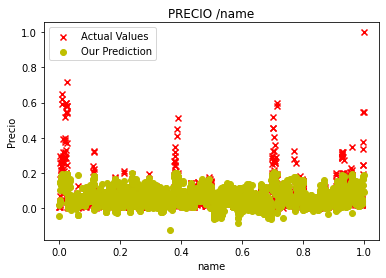

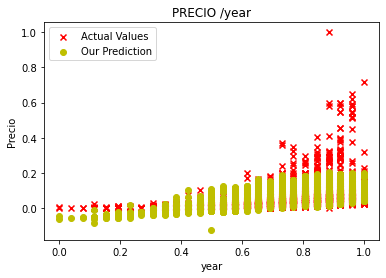

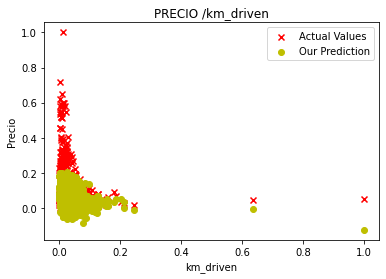

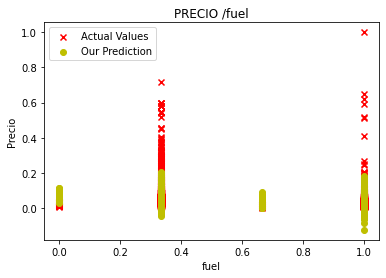

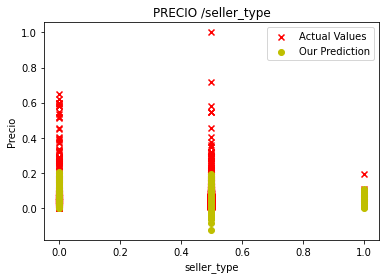

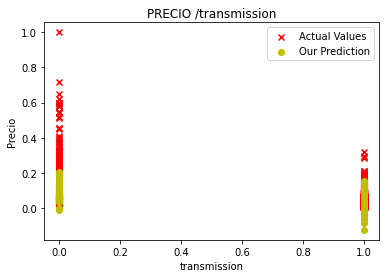

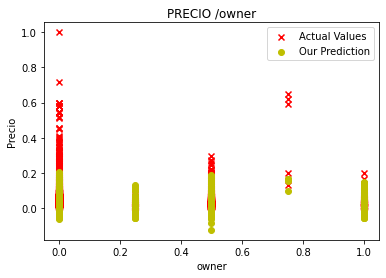

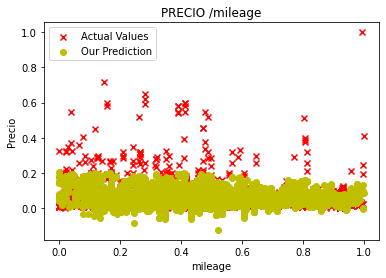

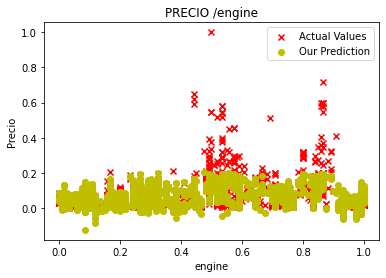

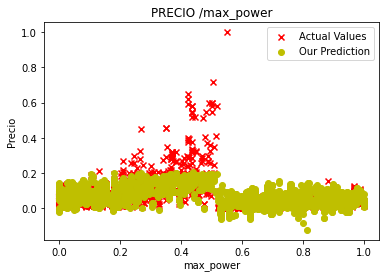

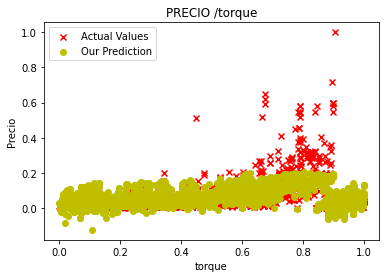

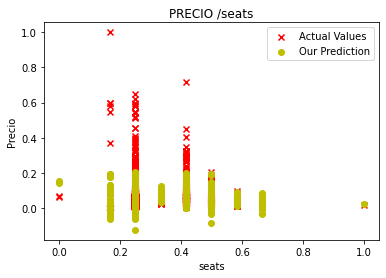

In [40]:
columns_names = data.columns.values
columns_names=np.delete(columns_names,2)
for i in range(12):

  # Plot the data points
  plt.scatter(x_train[:,[i]], y_train, marker='x', c='r',label='Actual Values')
  # Plot our model prediction
  plt.scatter(x_train[:,[i]], Y_pred, marker= 'o', c='y',label='Our Prediction')


  plt.title("PRECIO /" + str(columns_names[i]))
  # Set the y-axis label
  plt.ylabel('Precio')
  # Set the x-axis label
  plt.xlabel(str(columns_names[i]))
  plt.legend()
  plt.show()

In [51]:
print('Precisión del modelo:')
print(modelo.score(X_train, Y_train))

Precisión del modelo:
0.4798385275678032
